In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set plotting style
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 0.8
plt.rcParams['font.size'] = 9

# import dataset
df = pd.read_csv('../data/data_train_model.csv')
df.fillna(0, inplace=True)

df.sample(5)

,date,high,low,open,unix,cum_change,sma_7_up,sma_7,sma_7_low,ema_14,b_ma,bu,bl,cma_7,month,atr,year,close
772,2022-02-12,227.279999,217.440002,225.410004,1644624000,46.447302,235.087203,224.659049,214.230895,246.534089,267.448223,346.545910,188.350535,278.887165,2,14.263817,2022,218.933334
1661,2024-07-20,488.493327,478.439992,479.566661,1721433600,98.884929,507.786310,482.567146,457.347982,493.542420,507.135333,549.898943,464.371723,276.151000,7,15.567750,2024,480.326670
546,2021-07-01,354.670013,346.500000,346.820007,1625097600,30.016840,359.702129,349.715720,339.729311,344.929214,339.582668,355.299382,323.865954,254.697788,7,7.347103,2021,354.390015
384,2021-01-20,270.320007,263.600006,268.929993,1611100800,19.561597,270.417809,256.324290,242.230770,259.859638,261.602001,277.317230,245.886773,235.825689,1,7.976933,2021,267.480011
535,2021-06-20,333.996674,328.099996,332.236664,1624147200,29.197451,339.757261,333.245714,326.734168,332.164604,331.997332,337.107842,326.886821,252.829459,6,6.433906,2021,331.413340


In [3]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.fillna(0, inplace=True)

In [4]:
df.head()

,high,low,open,unix,cum_change,sma_7_up,sma_7,sma_7_low,ema_14,b_ma,bu,bl,cma_7,month,atr,year,close
date,,,,,,,,,,,,,,,,,
2020-01-02,209.789993,206.270004,206.750000,1577923200,0.045198,210.794776,209.779999,207.655221,209.779999,217.042583,227.120132,206.965034,211.514287,1,3.519989,2020,209.779999
2020-01-03,210.399994,206.949997,207.210007,1578009600,0.090156,210.794776,209.224998,207.655221,209.631999,217.042583,227.120132,206.965034,211.514287,1,3.514990,2020,208.669998
2020-01-04,211.193329,206.806666,207.040003,1578096000,0.135397,210.888098,209.476666,208.065234,209.678399,217.042583,227.120132,206.965034,211.514287,1,3.577252,2020,209.980001
2020-01-05,211.986664,206.663335,206.870000,1578182400,0.180920,212.078555,209.930000,207.781446,209.893280,217.042583,227.120132,206.965034,211.514287,1,3.701972,2020,211.290003
2020-01-06,212.779999,206.520004,206.699997,1578268800,0.226725,213.491436,210.464001,207.436567,210.254176,217.042583,227.120132,206.965034,211.514287,1,3.884688,2020,212.600006


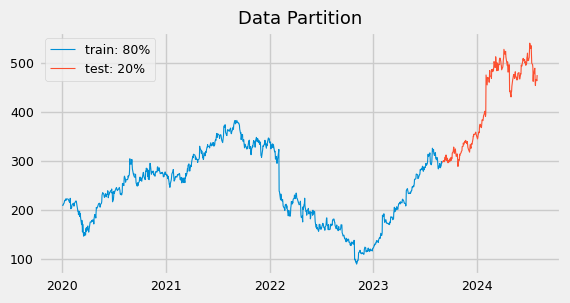

In [5]:
cut_off = int(len(df) * 0.8)

train = df[:cut_off]
test = df[cut_off:]

X_train = train.drop(['close'], axis=1)
X_test = test.drop(['close'], axis=1)
y_train = train['close']
y_test = test['close']

# plot train / test split
plt.figure(figsize=(6, 3))

plt.plot(train['close'], label='train: 80%')
plt.plot(test['close'], label='test: 20%')
plt.title('Data Partition')
plt.legend()

plt.show()

In [6]:
# auto ARIMA function
from pmdarima import auto_arima

stepwise_fit = auto_arima(
    y=y_train,
    X=X_train,               # exogenous variables
    seasonal=True,          # data has no seasonality
    m = 7,
    test='adf',              # use adftest to find optimal 'd'
    d=None,                  # let model determine 'D'
    D=None,
    trace=True,              # print fit status
    alpha=0.05,              # p-value for testing significance
    suppress_warnings=True,
    error_action='ignore',
    stepwise=True,
    scoring='mse'
)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=5405.499, Time=1.93 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5518.133, Time=0.78 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=5410.169, Time=1.55 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5417.909, Time=1.60 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=13811.303, Time=0.75 sec
 ARIMA(2,0,2)(0,0,1)[7] intercept   : AIC=5403.697, Time=2.17 sec
 ARIMA(2,0,2)(0,0,0)[7] intercept   : AIC=5402.002, Time=1.25 sec
 ARIMA(2,0,2)(1,0,0)[7] intercept   : AIC=5403.636, Time=1.90 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=5406.073, Time=1.18 sec


c:\Users\DANG QUOC TOAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\DANG QUOC TOAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=5529.838, Time=1.06 sec
 ARIMA(3,0,2)(0,0,0)[7] intercept   : AIC=5402.821, Time=1.38 sec
 ARIMA(2,0,3)(0,0,0)[7] intercept   : AIC=5405.357, Time=1.33 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=5409.803, Time=1.03 sec
 ARIMA(1,0,3)(0,0,0)[7] intercept   : AIC=5402.971, Time=1.22 sec
 ARIMA(3,0,1)(0,0,0)[7] intercept   : AIC=5400.962, Time=1.22 sec
 ARIMA(3,0,1)(1,0,0)[7] intercept   : AIC=5402.804, Time=1.95 sec
 ARIMA(3,0,1)(0,0,1)[7] intercept   : AIC=5402.978, Time=1.89 sec
 ARIMA(3,0,1)(1,0,1)[7] intercept   : AIC=5404.782, Time=2.34 sec
 ARIMA(3,0,0)(0,0,0)[7] intercept   : AIC=5399.060, Time=1.25 sec
 ARIMA(3,0,0)(1,0,0)[7] intercept   : AIC=5400.967, Time=1.84 sec
 ARIMA(3,0,0)(0,0,1)[7] intercept   : AIC=5401.176, Time=1.79 sec
 ARIMA(3,0,0)(1,0,1)[7] intercept   : AIC=5402.974, Time=1.93 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=5409.113, Time=0.94 sec
 ARIMA(4,0,0)(0,0,0)[7] intercept   : AIC=5400.974, Time=1.27 sec
 ARIMA(4,0

c:\Users\DANG QUOC TOAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\DANG QUOC TOAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(0,0,0)[7]             : AIC=5527.837, Time=1.52 sec
 ARIMA(4,0,1)(0,0,0)[7]             : AIC=5401.138, Time=1.61 sec

Best model:  ARIMA(3,0,0)(0,0,0)[7]          
Total fit time: 53.167 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1338
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -2678.530
Date:                Sat, 30 Nov 2024   AIC                           5397.060
Time:                        03:23:30   BIC                           5501.039
Sample:                    01-02-2020   HQIC                          5436.018
                         - 08-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
high           0.7652   9.73e-05   7865.569      0.000       0.765       0.765
low            0.7732   9.62e-05   8037.846      0.000       0.773       0.773
open          -0.5960   9.72e-05  -6133.252      0.000      -0.596      -0.596
unix       -6.175e-08   1.64e-10   -377.380      0.000   -6.21e-08   -6.14e-08
cum_change     0.1107   2.92e-06    3.8e+04      0.000       0.111       0.111
sma_7_up      -1.4990   9.73e-05  -1.54e+04      0.000      -1.499      -1.499
sma_7          2.7908   9.78e-05   2.85e+04      0.000       2.791       2.791
sma_7_low     -1.4872   9.83e-05  -1.51e+04      0.000      -1.487      -1.487
ema_14         0.4667   9.64e-05   4843.506      0.000       0.467       0.467
b_ma          -0.0695   9.54e-05   -728.430      0.000      -0.070      -0.069
bu            -0.0773   9.38e-05   -824.430      0.000      -0.078      -0.077
bl            -0.0617    9.7e-05   -635.599      0.000      -0.062      -0.061
cma_7         -0.0272   9.92e-06  -2747.148      0.000      -0.027      -0.027
month         -0.0079   1.32e-06  -5986.809      0.000      -0.008      -0.008
atr           -0.0744   8.49e-07  -8.77e+04      0.000      -0.074      -0.074
year           0.0511   6.51e-06   7857.380      0.000       0.051       0.051
ar.L1          0.2901   6.56e-07   4.42e+05      0.000       0.290       0.290
ar.L2         -0.0076   1.99e-07  -3.83e+04      0.000      -0.008      -0.008
ar.L3         -0.0950   3.32e-07  -2.87e+05      0.000      -0.095      -0.095
sigma2         3.2155   4.07e-08    7.9e+07      0.000       3.215       3.215
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               370.35
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.71e+22. Standard errors may be unstable.
"""